# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd # импортируем библиотеку Pandas
import matplotlib.pyplot as plt # импортируем библиотеку matplotlib для построения графиков
import datetime # импортируем элемент для управления датой и временем
import seaborn # импортируем библиотеку seaborn
import numpy as np


In [2]:
data = pd.read_csv('/datasets/real_estate_data',sep='\t' ) # загрузим файл real_estate_data и применим разделитель '\t'

In [3]:
data.describe() # опишем и изучим таблицу

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [4]:
data.head() # данные для работы, интерсено посмотреть

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.info()
data.head()
for column in data.columns:
    print(data[column].value_counts()) # изучим тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

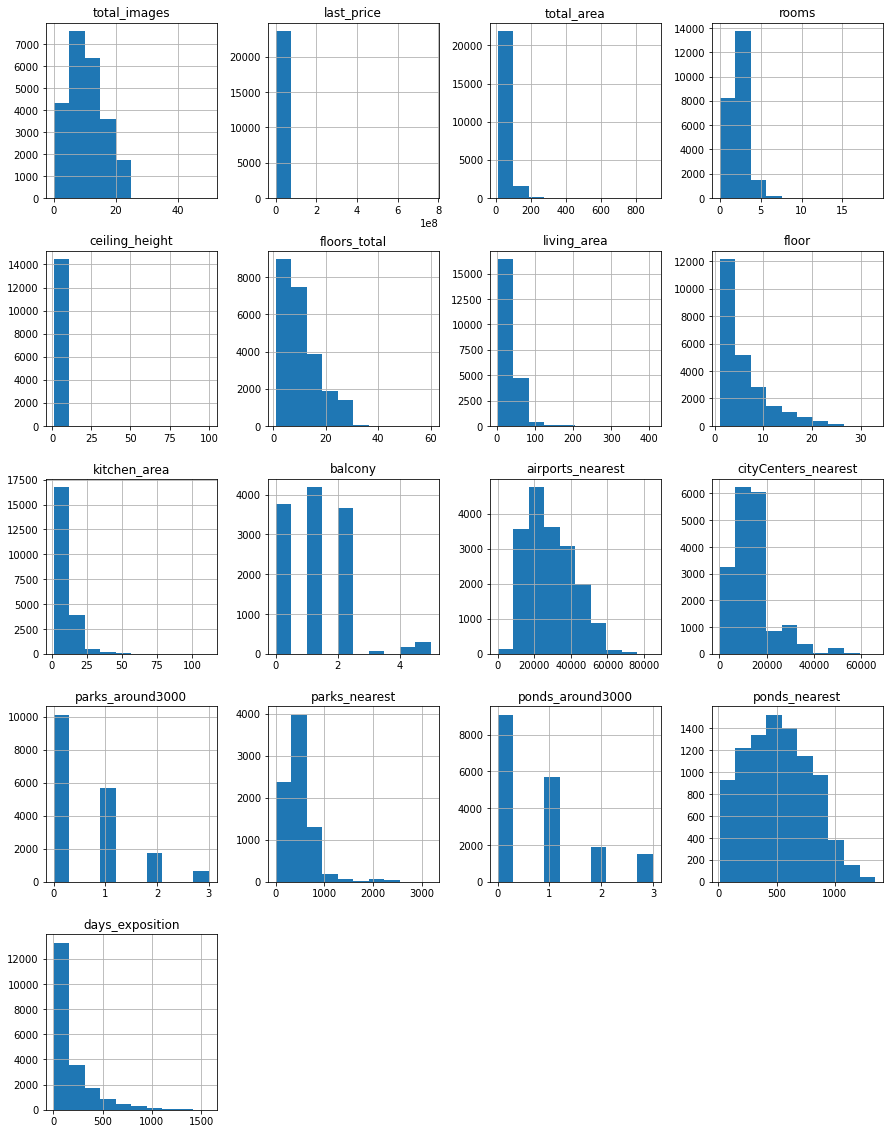

In [6]:
data.hist(figsize=(15, 20)) # построим гистограммы

Исходный данные представляют собой таблицу, содержащую 23699 записей и 22 признака. В качестве разделителя в csv файле используется знак табуляции (\t), вместо типичной точки с запятой. Первичный анализ показывает, что таблица содержит множество пустых значенений, которые в последующих частях проекта будут рассмотрены более подробно и обработаны.

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 Хорошая вводная часть.
</div>

### Предобработка данных

In [7]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'}) # переименуем столбец (придерживаемся стиля)
data.columns # проверим переименование

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

          1.Пропуски в столбце "balcony" заменим на 0. Допустим, что балконы не указаны из-за их отсутствия.


In [9]:
data['balcony'] = data['balcony'].fillna(0).astype('int') # заменим пропуски на ноль.

                                 2.Обработаем столбец - высоту потолков

In [10]:
data['ceiling_height'].value_counts() # обнаружено 5 объектов с нестандартной высотой потолков, похоже что это не ошибки , а реальные данные обЪектов, не плановой застройки.


2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

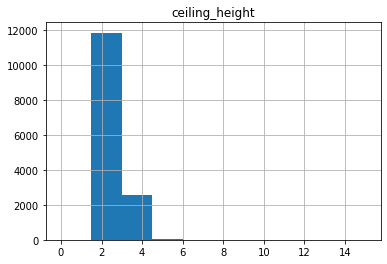

In [11]:
data.hist(column= 'ceiling_height', bins=10, range=(0,15))

In [12]:
data['ceiling_height'].median() # найдем медиану высоты потолков

2.65

In [13]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.65) #заменим пропуски в столбце "ceiling_height" на медианное значение

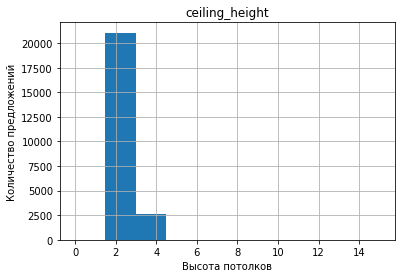

In [14]:
data.hist(column= 'ceiling_height', bins=10, range=(0,15)) # построим гистограмму после замены пропусков на медиану
plt.xlabel('Высота потолков')
plt.ylabel('Количество предложений')
plt.show()

*Потолки это довольно стандартизированнная величина, поэтому заменим пропуски на медианное значение.Также медиана устойчива к выбросам*

<div class="alert alert-danger">
<b>Комментарий ревьюера v.1</b> 
    
✍ 
Потолки это довольно стандартизированная величина, поэтому можно безболезненно заменить их медианой. Также медиана устойчива к выбросам.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v.2</b> 
    
👍 

</div>

                                   3. Столбец "floors_total" - - этажность

In [15]:
data.loc[data['floors_total'].isna()].head() # изучим пропуски по столбцу этажность дома

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,...,12.00,0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,...,NaN,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,...,10.63,0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,...,16.80,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,...,NaN,0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


In [16]:
data.dropna(subset=['floors_total'], inplace=True) # удалим пропуски

In [17]:
data['floors_total']=data['floors_total'].astype('int64') # Изменим тип данных на int

                                    4.Столбец "first_day_exposition"

In [18]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') # Преобразуем в удобный формат


                                    5. Столбец "rooms"

In [19]:
data.query('rooms == 0')['rooms'].count() # изучим нули в столбце комнаты

194

In [20]:
data.query('rooms == 0').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,2.65,24,15.50,2,NaN,...,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,2.65,14,17.00,1,NaN,...,NaN,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,2.65,17,24.75,4,NaN,...,NaN,2,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,2.65,26,24.30,19,NaN,...,NaN,1,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,2.65,10,NaN,7,NaN,...,NaN,0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01,0,2.75,25,17.50,21,NaN,...,NaN,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07,0,2.70,9,12.00,1,NaN,...,NaN,0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
780,9,2600000.0,26.10,2018-02-20,0,2.65,18,NaN,8,NaN,...,NaN,1,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
839,14,1900000.0,35.00,2017-04-14,0,2.70,5,15.00,3,False,...,NaN,1,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000.0,23.00,2016-09-27,0,2.65,27,18.00,7,NaN,...,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0


*Допустим что это объекты - студии. так как в столбце  - кухня , в этих строках имеются пропуски. Оставим данные в столбце "rooms" в первоначальном варианте.*


                                    6.Столбец "living area"

In [21]:
data['living_area'].agg(['min','max','mean','median']) # изучим столбец -  жилая площадь

min         2.000000
max       409.700000
mean       34.462781
median     30.000000
Name: living_area, dtype: float64

In [22]:
data.query('living_area < 5') # 4 квартиры с аномальными данными в столбце - жилая недвижимость. в целом это не повлияет на результаты исследования

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3242,7,4440000.0,41.0,2017-07-02,1,2.65,17,3.0,17,NaN,...,11.0,0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
13915,20,6350000.0,52.0,2018-02-06,2,3.00,6,2.0,2,NaN,...,9.0,0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
21758,0,2330000.0,23.0,2018-01-01,0,2.65,24,2.0,22,NaN,...,NaN,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0
23574,14,64990000.0,139.0,2015-11-24,3,3.00,8,3.0,8,NaN,...,16.0,1,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0


In [23]:
data.loc[data['living_area'] < 5, 'living_area'] = None # заменим аномальные значения на None

In [24]:
data['living_area'].isna().sum() # посчитаем пропуски

1874

In [25]:
data.query('living_area < 5') # проверим результат замены на None

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


*Пропуски оставим как есть, так как причины возникновения их может быть разнородной: незнание,ненужность и др.*

                                  7.Столбцы (расстояния и окружности)

*7.1 Просмотрим значения в столбце "airports_nearest"*

In [26]:
data['airports_nearest'].agg(['min','max','mean','median']) 

min           0.000000
max       84869.000000
mean      28788.008185
median    26726.000000
Name: airports_nearest, dtype: float64

In [27]:
data.query('airports_nearest == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9,19.8,3,NaN,...,6.0,2,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


In [28]:
data.loc[data['airports_nearest'] == 0, 'airports_nearest'] = None # удалим аномальные нулевые значения, заменим их на None

In [29]:
data.query('airports_nearest == 0') # посмотрим результат

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [30]:
data['airports_nearest'].min() # хорошо , одна квартира находится на расстоянии 6,5км от ближайшего аэропорта

6450.0

*Оставим пропуски как есть, так как мы не можем логично заменить их на какие-либо расчетные данные.*

*7.2 Посмотрим столбец city_centers_nearest.*

In [31]:
data['city_centers_nearest'].agg(['min','max','mean','median']) 

min         181.000000
max       65968.000000
mean      14185.084015
median    13093.000000
Name: city_centers_nearest, dtype: float64

*Оставим пропуски как есть, так как мы не можем корректно заменить их на какие-либо расчетные данные.*

*7.3 Посмотрим столбец parks_nearest*

In [32]:
data['parks_nearest'].agg(['min','max','mean','median'])

min          1.00000
max       3190.00000
mean       490.55463
median     455.00000
Name: parks_nearest, dtype: float64

In [33]:
data['parks_nearest'].isna().sum()

15568

In [34]:
parks_near = data.pivot_table(index='last_price', values=['parks_around3000','parks_nearest'])

In [35]:
parks_near.head(10)

,parks_around3000,parks_nearest
last_price,,
12190.0,1.0,805.0
1190000.0,0.0,NaN
1200000.0,0.0,NaN
1350000.0,0.0,NaN
1400000.0,0.0,NaN
1500000.0,0.0,NaN
1550000.0,0.0,NaN
1600000.0,1.0,937.0
1650000.0,0.0,NaN


Можно предположить что объекты находятся на значительном удалении  от парков. Владельцы посчитали их неважными и необязательными. И мы видим что,в радиусе 3км наличие парков не указано. Оставим пропуски как есть, в виду отсутствия логичной замены качественными данными.

*7.4 Посмотрим столбец parks_around3000*

In [36]:
data['parks_around3000'].agg(['min','max','mean','median']) # изучим столбец parks_around3000

min       0.000000
max       3.000000
mean      0.611433
median    0.000000
Name: parks_around3000, dtype: float64

In [37]:
data['parks_around3000'].isna().sum() # посчитаем отдельно пропуски для наглядности

5508

In [38]:
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int') # заменим пропуски на ноль и тип данных на int

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           21739 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

*В столбце "парки в радиусе 3км" можно заменить пропуски на нулевые значения, так как можно предположить что рядом с данными объектами парков нет и в связи этим владельцы квартир не заполнили данную колонку.*

*7.5 Посмотрим столбец ponds_around3000*

In [40]:
data['ponds_around3000'].agg(['min','max','median']) # изучим столбец ponds_around3000

min       0.0
max       3.0
median    1.0
Name: ponds_around3000, dtype: float64

In [41]:
data['ponds_around3000'].isna().sum() # посчитаем пропуски

5508

In [42]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int') # заменим на ноль и изменим тип данных на int

 *По аналогии со  столбцом "парки в радиусе 3км" в столбце "пруды в радусе 3км" можно заменить пропуски на нулевые значения, так как можно предположить что рядом с данными объектами парков нет и в связи этим владельцы квартир не заполнили данную колонку.*

*7.6 Проведём исследование данных в колонке "ponds_nearest"*

In [43]:
data['ponds_nearest'].agg(['min','max','median'])

min         13.0
max       1344.0
median     503.0
Name: ponds_nearest, dtype: float64

In [44]:
data['ponds_nearest'].isna().sum()

14552

*Более 50% данных не имеют значений, это означает, что водоёмов по близости нет и такие данные заполнять какими-либо значениями не логично.*

                                  8. Столбец "locality_name" удалим неявные дубликаты

In [45]:
data.dropna(subset=['locality_name'], inplace=True) # удалить объекты ,где отсутствует назавание населенного пункта.

In [46]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа ','')
data['locality_name'] = data['locality_name'].str.replace('городской поселок ','')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции ','')
data['locality_name'] = data['locality_name'].str.replace('поселок станции ','')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок ','')
data['locality_name'] = data['locality_name'].str.replace('поселок ','')
data['locality_name'] = data['locality_name'].str.replace('деревня ','')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество ','')
data['locality_name'] = data['locality_name'].str.replace('село ','')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество ','')
print(len(data['locality_name'].unique())) 
data['locality_name'].unique() # просмотрим значения

305


array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

                                   9.Столбец "is_apartment" преабразуем тип столбца в bool

In [47]:
data['is_apartment'].unique() # отфильтрум уникальные значения

array([nan, False, True], dtype=object)

In [48]:
data['is_apartment'] = data['is_apartment'].fillna(False) # заменим Nan на False

In [49]:
data['is_apartment'].isna().sum() # посчитаем пропущенные значения

0

                              10. Столбец "kitchen_area"

In [50]:
data['kitchen_area'].isna().sum() # посчитаем пропущенные значения

2222

In [51]:
#data['kitchen_area'] = data['kitchen_area'].fillna(0) # Заполним нулевыми значениями. Скорее всего это студия.

Пропуски оставим как есть ,предполагая что это квартиры студии, либо из-за незнания данных владельцем, 
либо это необязательный столбец для заполнения. Нелогично заполнять пропуски расчетными данными, чтобы 
не искажать в дальнейшем результаты анализа.

*Подведем итоги. Мы с вами оставили,заменили пропуски на нули, Высоту потолков заменили на медианное значение , удалили строки, в которых отсутствует название локации,этаж квартиры. Изменили тип данных в столбцах.Очистили данные от неявных дубликатов. Теперь можно приступать к расчетам.*

### Посчитайте и добавьте в таблицу новые столбцы

Посчитаем цену одного квадратного метра

In [53]:
data['price_one_square_meter'] = data['last_price']/data['total_area'] # Создадим столбец price_one_square_metr

In [54]:
data['price_one_square_meter'] = data['price_one_square_meter'].astype('int') # для удобства приведем к целочисленному типу данных

In [55]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000


In [56]:
data['price_one_square_meter'].mean().round(1) # Средняя цена за кв.м  с учетом всех данных по г.Санкт - Петербургу и его окрестностях

99405.4

День недели, месяц и год публикации объявления 

In [57]:
data['weekday'] = data['first_day_exposition'].dt.weekday # создадим собственную функцию weekday_name
def weekday_name(day):
    if day == 0:
        return 'понедельник'
    if day == 1:
        return 'вторник'
    if day == 2:
        return 'среда'
    if day == 3:
        return 'четверг'
    if day == 4:
        return 'пятница'
    if day == 5:
        return 'суббота'
    if day == 6:
        return 'воскресенье'
    
data['weekday'] = data['weekday'].apply(weekday_name)

In [58]:
data['month_exposition']=data['first_day_exposition'].dt.month # создадим столбец month_exposition

In [59]:
data['years_exposition']=data['first_day_exposition'].dt.year # создадим столбец years_exposition

In [60]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,weekday,month_exposition,years_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1,482.0,2,755.0,NaN,120370,четверг,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18603.0,0,NaN,0,NaN,81.0,82920,вторник,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,13933.0,1,90.0,2,574.0,558.0,92785,четверг,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,6800.0,2,84.0,3,234.0,424.0,408176,пятница,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2,112.0,1,48.0,121.0,100000,вторник,6,2018


In [61]:
def create_floor_category(row): # создадим функцию create_floor_category
    floor = row['floor']
    if floor == 1:
        return 'первый'
    if floor == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
    
data['floor_category'] = data.apply(create_floor_category, axis=1) # Создадим столбец floor_category


Расстояние до центра города в километрах 

In [62]:
data['city_centers_nearest_km'] = (data['city_centers_nearest']/1000) # Создадим столбец city_centers_nearest_km

In [63]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,weekday,month_exposition,years_exposition,floor_category,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,120370,четверг,3,2019,другой,16.028
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0,NaN,81.0,82920,вторник,12,2018,первый,18.603
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2,574.0,558.0,92785,четверг,8,2015,другой,13.933
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,84.0,3,234.0,424.0,408176,пятница,7,2015,другой,6.800
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,100000,вторник,6,2018,другой,8.098


Чем ближе объект находится к центру города тем дороже стоит м2. И при этом не все так однозначно, есть исключения из правил.

### Проведите исследовательский анализ данных

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

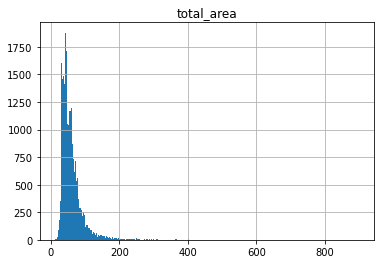

In [64]:
data.hist(column='total_area',bins=300) # построим гистграмму для total_area

Диаграмма размаха площади квартиры


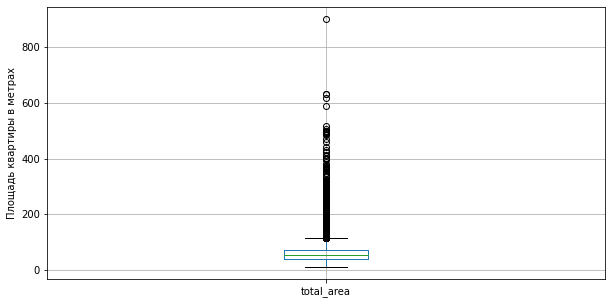

In [65]:
print('Диаграмма размаха площади квартиры')
data.boxplot(column=['total_area'], figsize=(10,5), grid=True)
plt.ylabel('Площадь квартиры в метрах')
plt.show()

In [66]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Нам интересно проанализировать объекты недвижости площадью до 100м2

In [67]:
good_data = data.query('total_area < 100')

Диаграмма размаха площади квартиры до 100м2


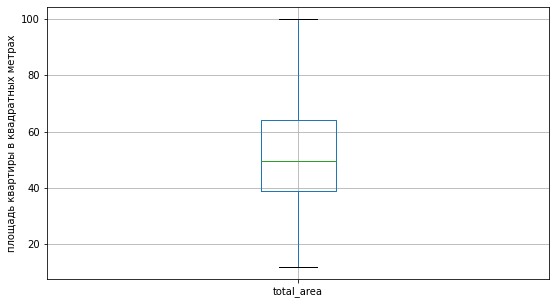

In [68]:
print('Диаграмма размаха площади квартиры до 100м2')
good_data.boxplot(column=['total_area'], figsize=(9,5), grid=True)
plt.ylabel('площадь квартиры в квадратных метрах')
plt.show()

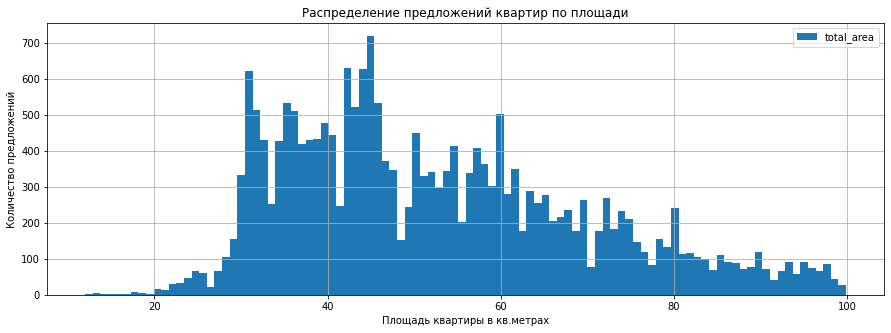

In [69]:
good_data.sort_values(by='total_area', ascending=True).plot(kind='hist', y='total_area',title='Распределение предложений квартир по площади',bins=100, figsize=(15,5), grid=True)

plt.xlabel('Площадь квартиры в кв.метрах')
plt.ylabel('Количество предложений')
plt.show()

Данные графики показывают что, на рынке недвижимости г.Санкт-Петербурга и его окрестностях, 
объекты недвижимости площадью от: 30-70м2 - 80% ,
                                  70-100м2 - 15%,  
                                  20-30м2  - 5%.

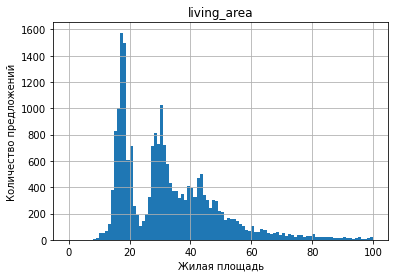

In [70]:
data.hist(column='living_area',bins=100,range=(0,100)) # построим гистграмму для living_area
plt.xlabel('Жилая площадь')
plt.ylabel('Количество предложений')
plt.show()

Пиковые значения продаж, приходится на жилую площадь 17-18м2 и 30м2. Это получается 1,2-х комнатные квартиры

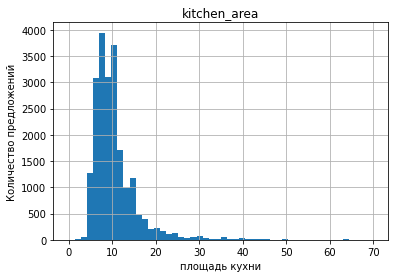

In [71]:
data.hist(column='kitchen_area',bins=50,range=(0,70)) # построим гистграмму для kitchen_area
plt.xlabel('площадь кухни')
plt.ylabel('Количество предложений')
plt.show()

Значения  в районе нуля - предположим это студии, болле 2500 предложений, и в основном предлагаются кухни площадью от 5 до 15м2. Пиковые значения приходятся на предложения где кухни размером 8-10м2.

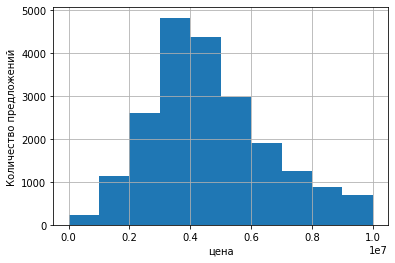

In [72]:
data['last_price'].hist(bins=10,range=(0,10000000)) # построим гистграмму для last_price
plt.xlabel('цена')
plt.ylabel('Количество предложений')
plt.show()

 Гистограмма цены, значение в 10 млн.  Вывод- цена  квартир на рынке находится в диапазоне  3-4 млн руб.

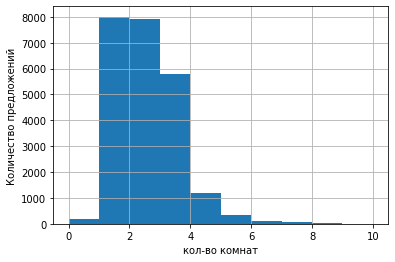

In [73]:
data['rooms'].hist(bins=10,range=(0,10)) # построим гистграмму для rooms
plt.xlabel('кол-во комнат')
plt.ylabel('Количество предложений')
plt.show()

Объем 1,2 -х комантных квартир преобладает на рынке, и составляет по 8 тыс предложений. 3,4х комнатные квартиры составляют по 6тыс предложений.

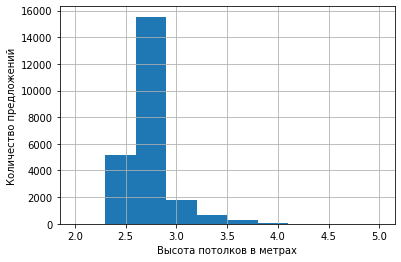

In [74]:
data['ceiling_height'].hist(bins=10,range=(2,5)) # построим гистграмму для ceiling_height
plt.xlabel('Высота потолков в метрах')
plt.ylabel('Количество предложений')
plt.show()

Примерно 70% это около 15500 предложений, где высота потолка - 2,6-2,9 м. 

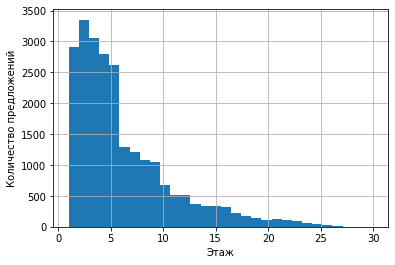

In [75]:
data['floor'].hist(bins=30,range=(1,30)) # построим гистграмму для floor
plt.xlabel('Этаж')
plt.ylabel('Количество предложений')
plt.show()

В основном предлагаются квартиры которые находятся со второго до 6 этажей.

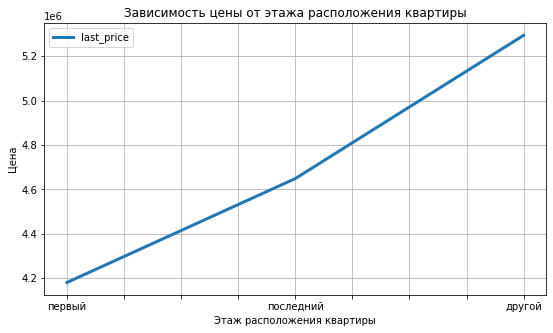

In [76]:
(good_data
     .pivot_table(index='floor_category', values='last_price').sort_values(by='last_price', ascending=True)
     .plot(grid=True, figsize=(9, 5),linewidth=3, title='Зависимость цены от этажа расположения квартиры')  # построим гистграмму для floor_category
)
plt.xlabel('Этаж расположения квартиры')
plt.ylabel('Цена')
plt.show()

*Наблюдается динамичный рост цен в зависмотси от типа этажа: на первом этаже самые низкие цены, затем выше цена на последних этажах, и в категориий "другой" цена самая высокая.Это связано с рисками, например, затопления на первых и последних этажах.*

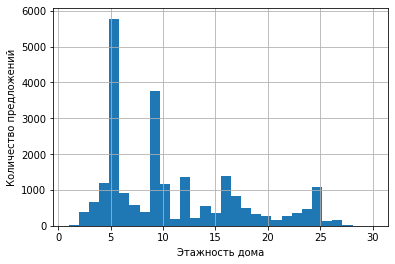

In [77]:
data['floors_total'].hist(bins=30,range=(1,30)) # построим гистграмму для floors_total
plt.xlabel('Этажность дома')
plt.ylabel('Количество предложений')
plt.show()

На общем фоне выделяются большое количество предложений в 5ти этажных  и 9ти этажных домах. Жилой фонд Советских времен. 

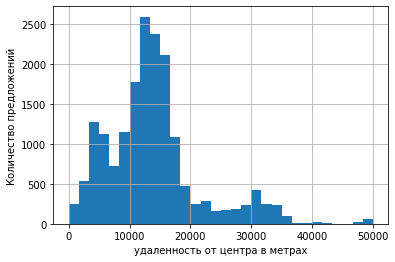

count    18064
mean     14192
std       8613
min        181
25%       9238
50%      13096
75%      16285
max      65968
Name: city_centers_nearest, dtype: int64

In [78]:
data['city_centers_nearest'].hist(bins=30,range=(1,50000)) # построим гистграмму для city_centers_nearest
plt.xlabel('удаленность от центра в метрах')
plt.ylabel('Количество предложений')
plt.show()

data['city_centers_nearest'].describe().astype('int')

*В основном предлагаются объекты недвижимости удаленные от центра на 13-17тысяч метров. Среднее значение это 14км. Самый удаленный объект от центра находится на расстоянии почти 66км.*

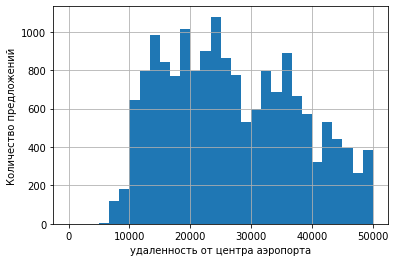

count    18040
mean     28798
std      12631
min       6450
25%      18571
50%      26757
75%      37273
max      84869
Name: airports_nearest, dtype: int64

In [79]:
data['airports_nearest'].hist(bins=30,range=(1,50000)) # построим гистграмму для airports_nearest
plt.xlabel('удаленность от центра аэропорта')
plt.ylabel('Количество предложений')
plt.show()

data['airports_nearest'].describe().astype('int')

*Основной объем предложений объектов недвижимости находится на расстоянии 10-40тыс. метров до ближайшего аэропорта. Среднее значение это 28,7км. Самый удаленный объект от аэропорта находится на расстоянии 84,8км.*

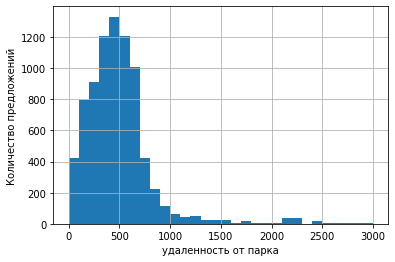

count    8030
mean      490
std       341
min         1
25%       288
50%       455
75%       612
max      3190
Name: parks_nearest, dtype: int64

In [80]:
data['parks_nearest'].hist(bins=30,range=(1,3000)) # построим гистграмму для parks_nearest
plt.xlabel('удаленность от парка')
plt.ylabel('Количество предложений')
plt.show()

data['parks_nearest'].describe().astype('int')

*Наибольшее количество предложений о продаже объектов недвижимости находится на расстоянии 500 метров до ближайшего парка. Среднее это 490м от парка. Есть объекты которые находятся в непосредственной близости с парком на расстоянии одного метра.*

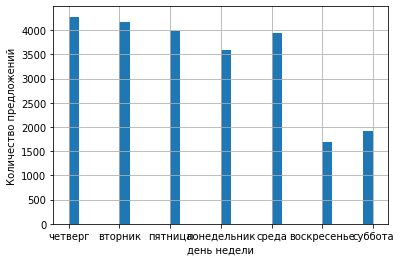

In [81]:
data['weekday'].hist(bins=30,range=(0,6)) # построим гистграмму для weekday
plt.xlabel('день недели')
plt.ylabel('Количество предложений')
plt.show()


*Предложения публикуются равномерно в рабочие дни, в два раза меньше - в выходные дни.*

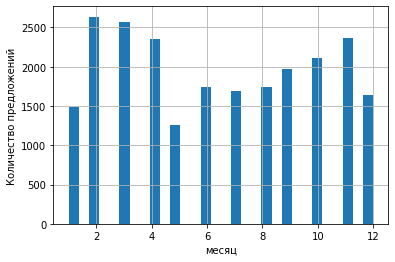

In [82]:
data['month_exposition'].hist(bins=30,range=(1,12)) # построим гистграмму для month_exposition
plt.xlabel('месяц')
plt.ylabel('Количество предложений')
plt.show()

Февраль, Март, Апрель - активные месяцы, на втором месте идут - сентябрь, октябрь,ноябрь по активности.

Изучим скорость продажи квартиры

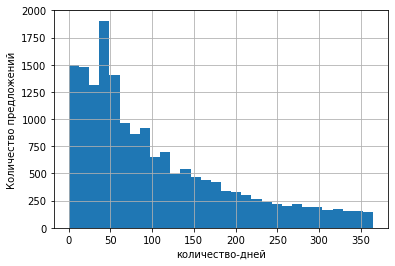

In [83]:
data['days_exposition'].hist(bins=30,range=(0,365)) # построим гистграмму для days_exposition
plt.xlabel('количество-дней')
plt.ylabel('Количество предложений')
plt.show()

Квартиры продаются в большинстве случаев до 60 дней, пиковые значения наблюдаются в интервале 40-50 дней.

In [84]:
data['days_exposition'].describe() # столбец days_exposition

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

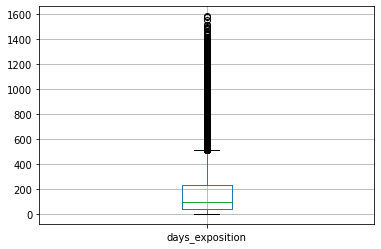

In [85]:
data.boxplot('days_exposition') # построим ящик с усами

Данные о предложениях объектов недвижимости , которые продаются от 250 дней отбросим, чтобы получить корректные для анализа, результаты.

In [86]:
ok_data = data.query('days_exposition < 250') # создадим срез ok_data 

In [87]:
ok_data['days_exposition'].agg(['mean','median']) # найдем среднее и медиану

mean      83.154745
median    63.000000
Name: days_exposition, dtype: float64

Стандартные объекты недвижимости реализуются в интервале 2-3 месяца. Продажи за 1 день  - это очень быстрая,необычная продажа, для рынка недвижимости. И соответственно продажа за 1580 дней необычно долгая продажа. Продажи в течении первой недели, после выставления квартиры на продажу, можно считать, очень быстрыми. И квартиры которые продаются больше года можно считать долгими продажами.

Изучим зависимость цены от различных параметров:Общей площади

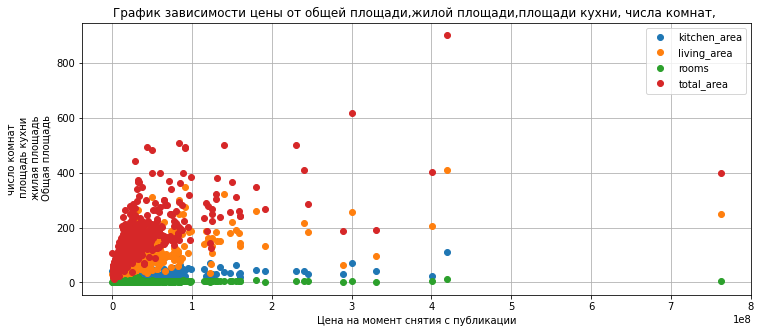

In [88]:
# Создадим сводную таблицу и построим график
(data
    
     .pivot_table(index='last_price', values=['total_area','living_area','kitchen_area','rooms',])
     .plot(style='o',grid=True, figsize=(12, 5), title='График зависимости цены от общей площади,жилой площади,площади кухни, числа комнат, ')
)
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('число комнат\n площадь кухни\n жилая площадь\n Общая площадь')
plt.show()


In [89]:
('Корреляция по общей площади', data['total_area'].corr(data['last_price']))

('Корреляция по общей площади', 0.6536213939252808)

In [90]:
('Корреляция по жилой площади', data['living_area'].corr(data['last_price']))

('Корреляция по жилой площади', 0.5671833278745027)

In [91]:
('Корреляция по площади кухни', data['kitchen_area'].corr(data['last_price']))

('Корреляция по площади кухни', 0.5203617949655245)

In [92]:
('Корреляция по количеству комнат', data['rooms'].corr(data['last_price']))

('Корреляция по количеству комнат', 0.3631905485065752)

Достаточно сильная прямо пропорциональная зависимость цены от общей и жилой площади квартиры. Завсимость цены от площади кухни и количества комнат также присутствует , при этом не является показательной.

<AxesSubplot:title={'center':'Зависимость цены от этажа квартиры'}, xlabel='floor_category'>

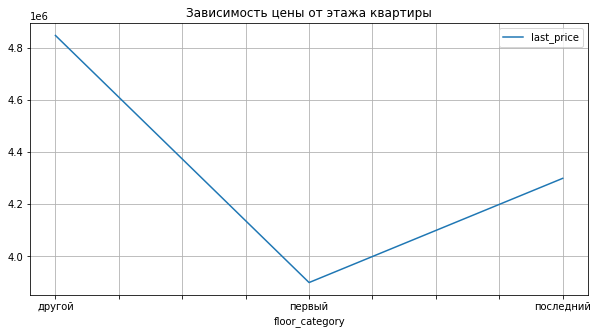

In [93]:
# Создадим сводную таблицу и построим график
(data
    .pivot_table(index='floor_category', values='last_price', aggfunc='median')
    .plot(title='Зависимость цены от этажа квартиры', grid=True, figsize=(10,5))
)


* Зависимость очевидна, от того на каком этаже находится квартира. Исходя из графика подтверждается,что квартиры - самые дешевые, далее немного дороже(10%) квартиры на последнем этаже. И на всех других этажах - самые дорогие квартиры.*

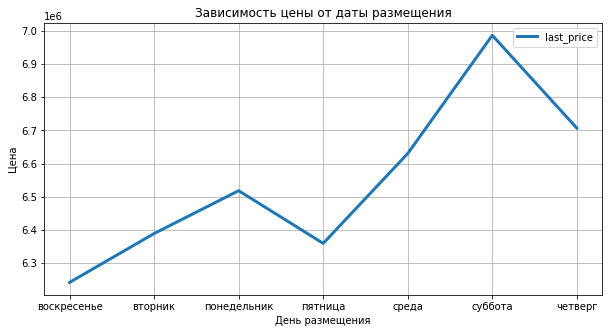

In [94]:
# Создадим сводную таблицу и построим график
(data
    
     .pivot_table(index='weekday', values=['last_price'])
     .plot(grid=True, figsize=(10, 5),linewidth=3,title='Зависимость цены от даты размещения')
)
plt.xlabel('День размещения')
plt.ylabel('Цена')

plt.show()

По субботам размещают объявления с самыми высокими ценами. В воскресенье и пятницу размещают объявления с самыми низкими ценами. 

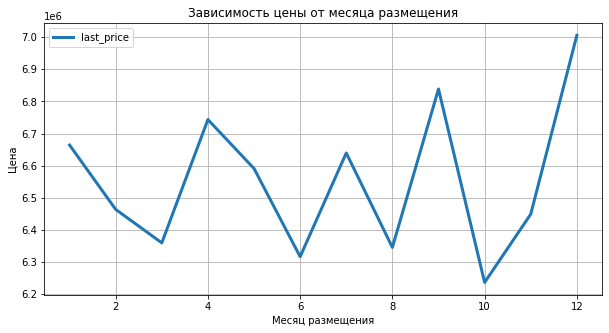

In [95]:
# Создадим сводную таблицу и построим график
(data
    
     .pivot_table(index='month_exposition', values=['last_price'])
     .plot(grid=True, figsize=(10, 5),linewidth=3, title='Зависимость цены от месяца размещения')
)
plt.xlabel('Месяц размещения')
plt.ylabel('Цена')

plt.show()

В апреле и сентябре цены на недвижимость очень высокие. Низкие цены наблюдаются в в первые два месяца года и затем в октябре. В летние месяцы стабильно цены устанавливают на среднем уровне.

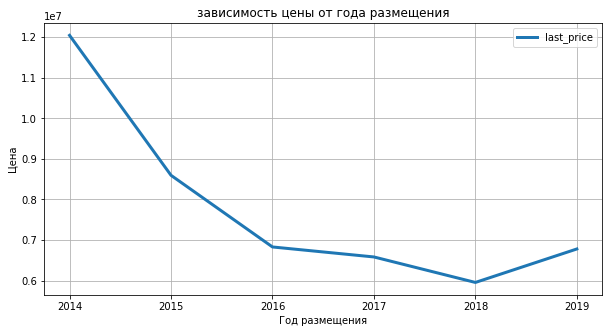

In [96]:
# построим график зависимости цены от года размещения при помощи сводной таблицы
(data
    
     .pivot_table(index='years_exposition', values=['last_price'])
     .plot(grid=True, figsize=(10, 5),linewidth=3,title='зависимость цены от года размещения')
     
)
plt.xlabel('Год размещения')
plt.ylabel('Цена')

plt.show()

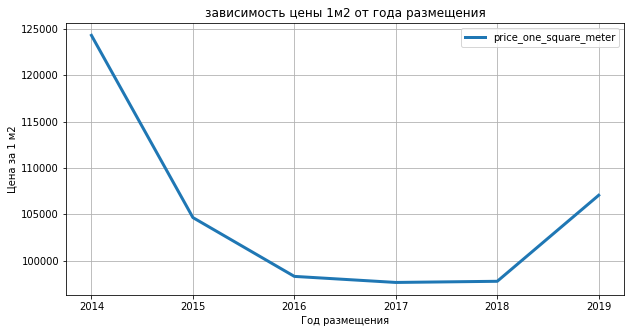

In [97]:
# построим график зависимости цены за 1м2 от года размещения при помощи сводной таблицы
(data
    
     .pivot_table(index='years_exposition', values=['price_one_square_meter'])
     .plot(grid=True, figsize=(10, 5),linewidth=3,title='зависимость цены 1м2 от года размещения')
     
)
plt.xlabel('Год размещения')
plt.ylabel('Цена за 1 м2')

plt.show()

Графики цены квартиры и цены за 1м2 анм показывают что,  с 2014 года цены на недвижимость стремительное падение вплоть до 2015 года, это связано с кризисом 2014года (резкое падением цены на нефть и укрепление доллара относительно рубля) и постепенным восстановлением экономики от кризиса. 2015 год наблюдается умеренное снижение цен. С 2016 по 2018 год наблюдаем минимальное колебание цен надвижимость, цена за 1м2 находится в одном коридоре 50-70 тыс.рублей, цены на квартиры продолжают умеренно снижаться. Это связано с уменьшением площади продаваемых квартир, с целью снижения суммы общего чека для покупателя.Начиная с 2018 года наблюдается рост, возможные причины: отностительная стабильность в экномике, инфляция,изменения в закондательной базе и др.

      	Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [98]:
top_10=data.pivot_table(index='locality_name',values='price_one_square_meter',aggfunc=('count','mean')) # создадим сводную таблицу
top_10.columns = ['count_adv','mean_price_meter'] # переименуем столбцы
(top_10.sort_values(by='count_adv',ascending=False)).astype('int').head(10) #  округлим до целого числа и выведем 10 строк

,count_adv,mean_price_meter
locality_name,,
Санкт-Петербург,15651,114868
Мурино,586,86040
Кудрово,470,95260
Шушары,439,78550
Всеволожск,398,68654
Пушкин,369,103125
Колпино,338,75424
Парголово,327,90175
Гатчина,307,68745


Культурная столица России в большом отрыве от своих окрестностей. И это естественно и закономерно.
Самая высокая цена за 1м2- 111тыс.руб в г.Санкт- Петербург . Самая низкая цена за 1м2 - 57тыс.руб в г.Выборг

                          Опишите, как стоимость объектов зависит от расстояния до центра города.

<AxesSubplot:xlabel='city_centers_nearest_km', ylabel='mean_price_for_km'>

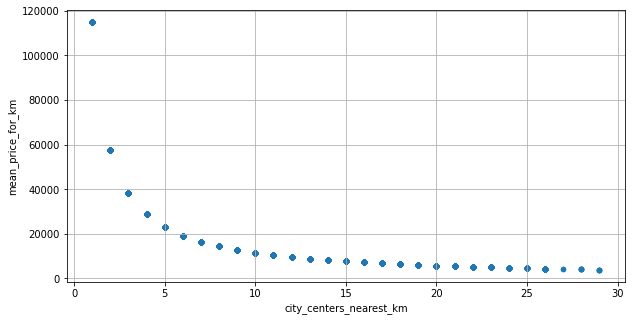

In [99]:
spb_city = data.query('locality_name == "Санкт-Петербург"') # сделаем срез квартир по г.Санкт -Петербург
spb_city = spb_city.dropna(subset = ['city_centers_nearest'], inplace = False) #убираем  пропуски для дальнейшей работы 
spb_city['city_centers_nearest_km'] = spb_city['city_centers_nearest_km'].round() #окгруляем до целых чисел
spb_city_mean_price_one_m = spb_city['price_one_square_meter'].mean() #средняя цена кв.м
spb_city['mean_price_for_km'] = spb_city_mean_price_one_m / spb_city['city_centers_nearest_km'] #средняя цена для каждого км
spb_city.plot(x='city_centers_nearest_km', y='mean_price_for_km', kind='scatter', figsize=(10, 5), grid=True)

Подведем итоги:  Исходя из данного графика делаем вывод что, сильно заметна  зависимость в пределах 10км от центра, цена км снижается с 60 тысяч до 17тысяч. Далее при удалении от 10 км до 30 км , цена снижается всего с 17 тысяч до 3 тысяч, завимсимость в этой части графика незначительна.

### Общий вывод

   Мы с вами завершили исследование объявлений о продаже квартир в г. Санкт- Петербурге и его окрестностях. В процессе работы 
познакомились с данными, изменили названия столбцов, удалили пропуски,заменили пропуски средним значением, добавили 
другие столбцы для работы над проектом. Также построили графики, гистограммы для наглядности исследования.
  В результате исследования мы выяснили какие факторы больше всего влияют на стоимость квартиры. Изучив предоставленные данные можно сделать несколько выводов: самые дорогие квартиры находятся в Санкт-Петербурге, средняя цена квадратного метра равна 114848 руб, самыедешевые - в Выборге: 58141 за квадратный метр. Наибольшее влияние на цену оказывает общая площадь квартиры и ее приближенность к центру. Выяснили что на рынке недвижимости преобладают объявления по продаже 1,2 х комнатных квартир, что подтверждает общий тренд по стране в целом. Также узнали что среднестатистическая квартира продается в интервале 2-3 месяца.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [х]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [х]  определены пропущенные значения
- [х]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод